# Predikcija pogodaka u NBA-u #

### Motivacija za ovakav projekt je poprilično očita, želi se poboljšati efikasnost šutera u NBA-u tako da momčadima omogući lakšu analizu i procjenu mjesta s kojeg bi u nekoj situaciji bilo najpogodnije pucati na koš ### 

In [1]:
# import-anje potrebnih library-a
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [2]:
pd.set_option('max_columns',None)
shot_logs = pd.read_csv('shot_logs.csv')

print("ATRIBUTI DATASET-A: ")
for column in shot_logs.columns:
    print(column)
    
print("\nBROJ PRIMJERA: ", len(shot_logs))


ATRIBUTI DATASET-A: 
GAME_ID
MATCHUP
LOCATION
W
FINAL_MARGIN
SHOT_NUMBER
PERIOD
GAME_CLOCK
SHOT_CLOCK
DRIBBLES
TOUCH_TIME
SHOT_DIST
PTS_TYPE
SHOT_RESULT
CLOSEST_DEFENDER
CLOSEST_DEFENDER_PLAYER_ID
CLOSE_DEF_DIST
FGM
PTS
player_name
player_id

BROJ PRIMJERA:  128069


In [3]:
# brišu se atributi FGM i PTS budući su oni savršeni prediktori ciljane varijable
shot_logs = shot_logs.drop(columns=['FGM', 'PTS'])

In [4]:
# analiza svih atributa
shot_logs.describe(include='all')

,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,player_name,player_id
count,1.280690e+05,128069,128069,128069,128069.000000,128069.000000,128069.000000,128069,122502.000000,128069.000000,128069.000000,128069.000000,128069.000000,128069,128069,128069.000000,128069.000000,128069,128069.000000
unique,NaN,1808,2,2,NaN,NaN,NaN,719,NaN,NaN,NaN,NaN,NaN,2,473,NaN,NaN,281,NaN
top,NaN,"FEB 07, 2015 - DAL vs. POR",A,W,NaN,NaN,NaN,0:01,NaN,NaN,NaN,NaN,NaN,missed,"Ibaka, Serge",NaN,NaN,james harden,NaN
freq,NaN,105,64135,64595,NaN,NaN,NaN,859,NaN,NaN,NaN,NaN,NaN,70164,814,NaN,NaN,1054,NaN
mean,2.140045e+07,NaN,NaN,NaN,0.208723,6.506899,2.469427,NaN,12.453344,2.023355,2.765901,13.571504,2.264670,NaN,NaN,159038.487284,4.123015,NaN,157238.251247
std,2.578773e+02,NaN,NaN,NaN,13.233267,4.713260,1.139919,NaN,5.763265,3.477760,3.043682,8.888964,0.441159,NaN,NaN,78791.172947,2.756446,NaN,79362.389336
min,2.140000e+07,NaN,NaN,NaN,-53.000000,1.000000,1.000000,NaN,0.000000,0.000000,-163.600000,0.000000,2.000000,NaN,NaN,708.000000,0.000000,NaN,708.000000
25%,2.140023e+07,NaN,NaN,NaN,-8.000000,3.000000,1.000000,NaN,8.200000,0.000000,0.900000,4.700000,2.000000,NaN,NaN,101249.000000,2.300000,NaN,101162.000000
50%,2.140045e+07,NaN,NaN,NaN,1.000000,5.000000,2.000000,NaN,12.300000,1.000000,1.600000,13.700000,2.000000,NaN,NaN,201949.000000,3.700000,NaN,201939.000000
75%,2.140067e+07,NaN,NaN,NaN,9.000000,9.000000,3.000000,NaN,16.675000,2.000000,3.700000,22.500000,3.000000,NaN,NaN,203079.000000,5.300000,NaN,202704.000000


## Kategorički podaci

Uočava se da su sljedeći atributi kategorički: *MATCHUP*, *LOCATION*, *W*, *DRIBBLES*, *SHOT_RESULT*, *CLOSEST_DEFENDER*, 
*CLOSEST_DEFENDER_PLAYER_ID*, *player_name*, *player_id*, *PTS_TYPE*, *SHOT_NUMBER*, *PERIOD* i *GAME_CLOCK*

vizulizirat će se sljedeća 6 atributa: LOCATION, W, DRIBBLES, SHOT_RESULT, PTS_TYPE i  SHOT_NUMBER. Dok se ostali neće budući su ostali atributi id-ovi igrača ili utakmica.

In [5]:
# uklanjanje atributa s više od dvije kategoričke vrijednosti
shot_logs.drop(columns=['GAME_ID', 'MATCHUP', 'CLOSEST_DEFENDER','CLOSEST_DEFENDER_PLAYER_ID', 'player_name','player_id'])

,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,PERIOD,GAME_CLOCK,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSE_DEF_DIST
0,A,W,24,1,1,1:09,10.8,2,1.9,7.7,2,made,1.3
1,A,W,24,2,1,0:14,3.4,0,0.8,28.2,3,missed,6.1
2,A,W,24,3,1,0:00,NaN,3,2.7,10.1,2,missed,0.9
3,A,W,24,4,2,11:47,10.3,2,1.9,17.2,2,missed,3.4
4,A,W,24,5,2,10:34,10.9,2,2.7,3.7,2,missed,1.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
128064,A,L,-16,5,3,1:52,18.3,5,6.2,8.7,2,missed,0.8
128065,A,L,-16,6,4,11:28,19.8,4,5.2,0.6,2,made,0.6
128066,A,L,-16,7,4,11:10,23.0,2,4.2,16.9,2,made,4.2
128067,A,L,-16,8,4,2:37,9.1,4,4.5,18.3,2,missed,3.0


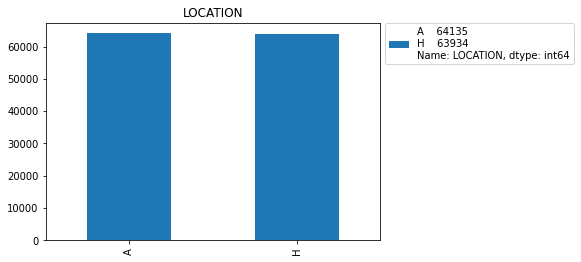

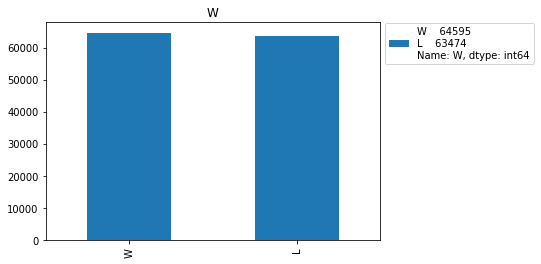

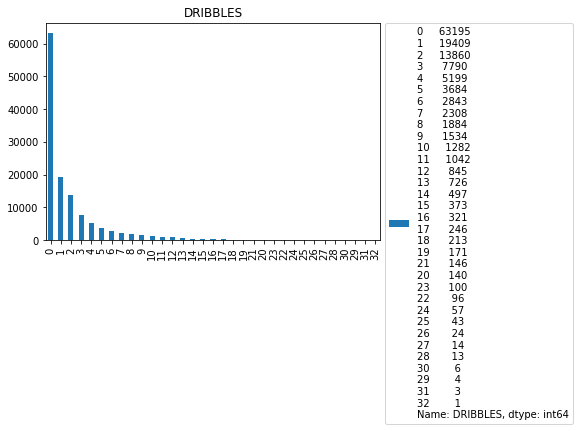

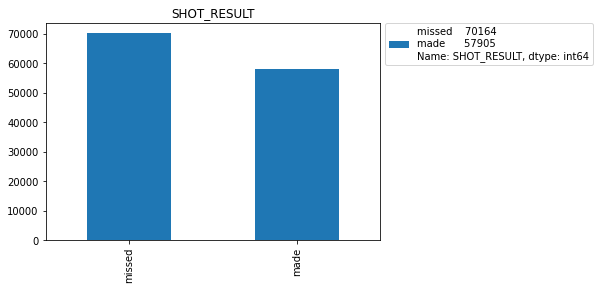

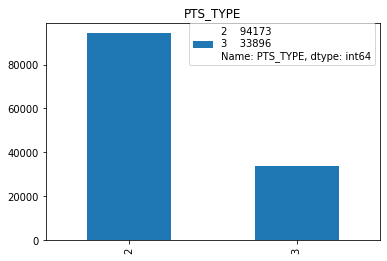

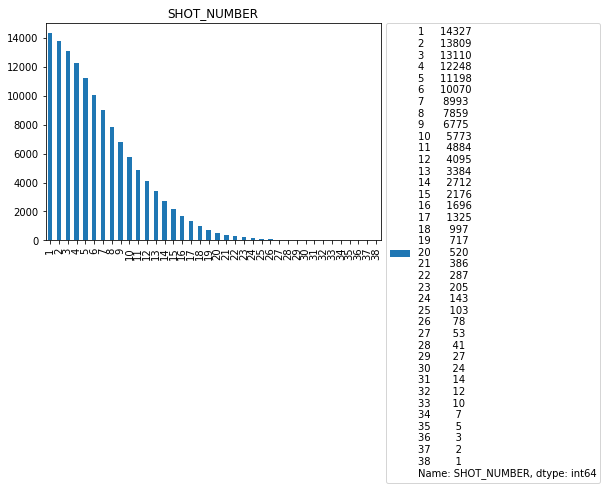

<Figure size 432x288 with 0 Axes>

In [6]:
categorical_features = ['LOCATION', 'W', 'DRIBBLES', 'SHOT_RESULT','PTS_TYPE','SHOT_NUMBER']
for i, categorical_feature in enumerate(shot_logs[categorical_features]):
    shot_logs[categorical_feature].value_counts().plot(kind="bar",label=str(shot_logs[categorical_feature].value_counts())).set_title(categorical_feature)
    plt.legend(bbox_to_anchor=(1, 1.022))
    plt.figure()
plt.show()

In [7]:
# posebno za atribut CLOSESR_DEFENDER ću iznijeti vrijednosti bez histograma jer bi bio nepregledan
# iz ispisa vidimo npr. da je Serge Ibaka najčešće najbliži igrač u obrani u ovom dataset-u te da je ukupno zabilježeno
# 473 igrača u ovoj ulozi
shot_logs['CLOSEST_DEFENDER'].value_counts()

Ibaka, Serge           814
Jordan, DeAndre        795
Gasol, Pau             754
Green, Draymond        751
Millsap, Paul          750
                      ... 
Ledo, Ricky              1
Lucas, Kalin             1
Moreland, Eric           1
Raduljica, Miroslav      1
Murry, Toure             1
Name: CLOSEST_DEFENDER, Length: 473, dtype: int64

## Numerički podaci

Uočava se da su sljedeći atributi numerički: *FINAL_MARGIN*, *SHOT_CLOCK*, *TOUCH_TIME*, *SHOT_DIST*

In [8]:
# Pogledajmo atribut GAME_CLOCK, njegov je oblik MM:SS tj. prikazan je minutama i sekundama,a želimo ga prebaciti u samo sekunde
print(shot_logs['GAME_CLOCK'])

# funkcija koja prima time string u obliku MM:SS i vraća vrijednost u sekundama
def get_seconds(time_string):
    date_time = datetime.datetime.strptime(time_string, "%M:%S")
    a_timedelta = date_time - datetime.datetime(1900, 1, 1)
    seconds = a_timedelta.total_seconds()
    return seconds

shot_logs['GAME_CLOCK']=shot_logs['GAME_CLOCK'].apply(get_seconds)

print(shot_logs['GAME_CLOCK'])

0          1:09
1          0:14
2          0:00
3         11:47
4         10:34
          ...  
128064     1:52
128065    11:28
128066    11:10
128067     2:37
128068     0:12
Name: GAME_CLOCK, Length: 128069, dtype: object
0          69.0
1          14.0
2           0.0
3         707.0
4         634.0
          ...  
128064    112.0
128065    688.0
128066    670.0
128067    157.0
128068     12.0
Name: GAME_CLOCK, Length: 128069, dtype: float64


In [9]:
# spajanje atributa GAME_CLOCK i PERIOD u novi atribut TOTAL_GAME_TIME koji 
# omoguaćava razlikovanje istih vremena za različite četvrtine. 
# Npr. nije isto pucati u zadnjoj minuti prve četvrtine i zadnje četvrtine.
shot_logs['TOTAL_GAME_TIME'] = shot_logs['GAME_CLOCK'] + (shot_logs['PERIOD'] - 1) * 12 * 60
print(print(shot_logs[['GAME_CLOCK','PERIOD','TOTAL_GAME_TIME']]))

# budući da su atributi GAME_CLOCK i PERIOD sadržani u atributu TOTAL_GAME_TIME, oni nam više ne trebaju pa se brišu
shot_logs.drop(columns=['GAME_CLOCK', 'PERIOD'])

        GAME_CLOCK  PERIOD  TOTAL_GAME_TIME
0             69.0       1             69.0
1             14.0       1             14.0
2              0.0       1              0.0
3            707.0       2           1427.0
4            634.0       2           1354.0
...            ...     ...              ...
128064       112.0       3           1552.0
128065       688.0       4           2848.0
128066       670.0       4           2830.0
128067       157.0       4           2317.0
128068        12.0       4           2172.0

[128069 rows x 3 columns]
None


,GAME_ID,MATCHUP,LOCATION,W,FINAL_MARGIN,SHOT_NUMBER,SHOT_CLOCK,DRIBBLES,TOUCH_TIME,SHOT_DIST,PTS_TYPE,SHOT_RESULT,CLOSEST_DEFENDER,CLOSEST_DEFENDER_PLAYER_ID,CLOSE_DEF_DIST,player_name,player_id,TOTAL_GAME_TIME
0,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,1,10.8,2,1.9,7.7,2,made,"Anderson, Alan",101187,1.3,brian roberts,203148,69.0
1,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,2,3.4,0,0.8,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,brian roberts,203148,14.0
2,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,3,NaN,3,2.7,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,brian roberts,203148,0.0
3,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,4,10.3,2,1.9,17.2,2,missed,"Brown, Markel",203900,3.4,brian roberts,203148,1427.0
4,21400899,"MAR 04, 2015 - CHA @ BKN",A,W,24,5,10.9,2,2.7,3.7,2,missed,"Young, Thaddeus",201152,1.1,brian roberts,203148,1354.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128064,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,5,18.3,5,6.2,8.7,2,missed,"Smart, Marcus",203935,0.8,jarrett jack,101127,1552.0
128065,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,6,19.8,4,5.2,0.6,2,made,"Turner, Evan",202323,0.6,jarrett jack,101127,2848.0
128066,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,7,23.0,2,4.2,16.9,2,made,"Thornton, Marcus",201977,4.2,jarrett jack,101127,2830.0
128067,21400006,"OCT 29, 2014 - BKN @ BOS",A,L,-16,8,9.1,4,4.5,18.3,2,missed,"Bradley, Avery",202340,3.0,jarrett jack,101127,2317.0


#### Normalizacija atributa
Provest ću normalizaciju atributa kako bi bili na istoj skali i jednako vrijedni

In [10]:
# Normalizacija
shot_logs['FINAL_MARGIN'] = (shot_logs['FINAL_MARGIN']-shot_logs['FINAL_MARGIN'].min())/(shot_logs['FINAL_MARGIN'].max()-shot_logs['FINAL_MARGIN'].min())
shot_logs['TOTAL_GAME_TIME'] = (shot_logs['TOTAL_GAME_TIME']-shot_logs['TOTAL_GAME_TIME'].min())/(shot_logs['TOTAL_GAME_TIME'].max()-shot_logs['TOTAL_GAME_TIME'].min())
shot_logs['SHOT_CLOCK'] = (shot_logs['SHOT_CLOCK']-shot_logs['SHOT_CLOCK'].min())/(shot_logs['SHOT_CLOCK'].max()-shot_logs['SHOT_CLOCK'].min())
shot_logs['TOUCH_TIME'] = (shot_logs['TOUCH_TIME']-shot_logs['TOUCH_TIME'].min())/(shot_logs['TOUCH_TIME'].max()-shot_logs['TOUCH_TIME'].min())
shot_logs['SHOT_DIST'] = (shot_logs['SHOT_DIST']-shot_logs['SHOT_DIST'].min())/(shot_logs['SHOT_DIST'].max()-shot_logs['SHOT_DIST'].min())

<AxesSubplot:>

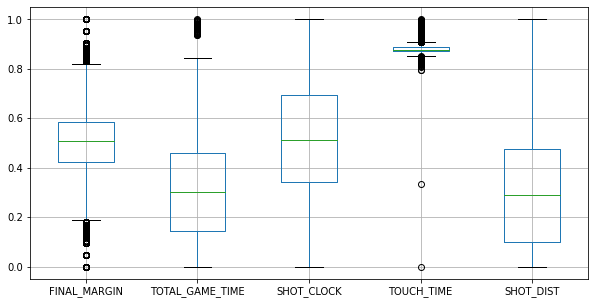

In [11]:
numerical_features = ['FINAL_MARGIN', 'TOTAL_GAME_TIME','SHOT_CLOCK', 'TOUCH_TIME', 'SHOT_DIST']

shot_logs.boxplot(column=numerical_features,figsize=(10,5))